In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)


In [9]:
#Need to add ones to the features matrix
X_b = np.c_[np.ones((100,1)),X]

In [11]:
#Use linalg to structure the linear regression model #important!
#theta = (Xtranspose * X)inv * Xtranspose * y
#This gives an n by n matrix
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
#Check Beta(intercept) and Beta1
theta_best

array([[ 3.78313952],
       [ 3.09228052]])

In [15]:
#Predict y on a new value of X
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.78313952],
       [ 9.96770055]])

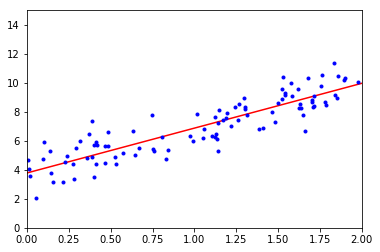

In [18]:
#plot model
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
#Create limits for the x and y axis, x goes from 0-2, y goes from 0-15
plt.axis([0,2,0,15])
plt.show()

In [19]:
#If we wanted to perform this operation quickly using sklearn methods:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([ 3.78313952]), array([[ 3.09228052]]))

In [20]:
lin_reg.predict(X_new)

array([[ 3.78313952],
       [ 9.96770055]])

In [30]:
#Gradient Descent algorithm with learning rate of eta
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [31]:
theta

array([[ 3.78313952],
       [ 3.09228052]])

In [32]:
#Stochastic gradient descent  using a simple learning schedule
n_epochs = 50
t0, t1 = 5,50 #learning schedule or hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients
        


In [33]:
theta

array([[ 3.75909971],
       [ 3.08732968]])

In [40]:
#Stochastic gradient descent using sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty = None,eta0=0.1)
sgd_reg.fit(X, y_ravel())

C:\Users\g2sha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


NameError: name 'y_ravel' is not defined

In [41]:
#Ridge regression using sklearn
#Cholesky is a matrix factorization method
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 8.37997322]])

In [42]:
#Ridge reg using stochastic gradient descent
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\g2sha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 8.2036491])

In [43]:
new_dict = {'gaurav': '41', 'tamlyn': '45', 'nolan': '7'}

In [56]:
new_dict['gaurav']

'41'

In [58]:
sum(i**3 for i in range(10))

2025